# Monte Carlo Uncertainty Analysis for Nonlinear Regression

**Further Reading:** §4.12

## Learning Objectives
After studying this notebook, attending class, asking questions, and reviewing your notes, you should be able to:
* Use simulation to calculate and analyze probabilities.
* Write code to simulate data, add noise, and visually inspect the distribution of fitted parameters through Monte Carlo Uncertainty Analysis.


In [1]:
# load libraries
import scipy.stats as stats
import numpy as np
import scipy.optimize as optimize
import math
import matplotlib.pyplot as plt

## Simulation

See [this notebook](../10-publish/04-Simulation.ipynb) for notes on simulating a problem to calculate probability, mean, variance, and to determine if a population is normal.

## Motivating Example: Cart + Incline
See [this notebook](../10-publish/04-Cart-and-Incline-Example.ipynb) to look at a motivating example for Monte Carlo Error Propogation.

## Motivating Example: Michaelis-Menten Enzymatic Reaction Kinetics

The **Michaelis-Menten** equation is an extremely popular model to describe the rate of enzymatic reactions.

$$
\mathrm{E} + \mathrm{S} \leftrightharpoons \mathrm{ES} \rightarrow \mathrm{E} + \mathrm{P}
$$

$$
r = V_{max} \frac{[\mathrm{S}]}{K_M + [\mathrm{S}]}
$$

Additional information: https://en.wikipedia.org/wiki/Michaelis%E2%80%93Menten_kinetics

In [9]:
## Create dataset

# Define exact coefficients
Vmaxexact=2;
Kmexact=5;

# Evaluate model
Sexp = np.array([.3, .4, 0.5, 1, 2, 4, 8, 16]);
rexp = Vmaxexact*Sexp / (Kmexact+Sexp);

# Add some random error to simulate 
rexp += 0.05*np.random.normal(size=len(Sexp))

# Evaluate model to plot smooth curve
S = np.linspace(np.min(Sexp),np.max(Sexp),100)
r = Vmaxexact*S / (Kmexact+S)

## Main Idea

* Use residuals to estimate uncertainty in dependent variable
* Simulate regression procedure 1000s of times, adding random noise to dependent variable
* Examine distribution of fitted values

In [18]:
# variance of residuals
print(sigre)

0.003717977540144133


## Pseudocode

<div class="admonition note"> 
<p class="title"><b>Class Activity</b></p>
 Write pseudocode with a partner.
</div>

## Python Hints

Let's say we want to generate a vector with 5 elements, each normally distributed with mean 0 and standard deviation 2. We can do this in one line using Python:

In [19]:
my_vec = np.random.normal(loc = 0,scale = 2,size=(5))
print(my_vec)

[-2.71241136  0.91627376 -0.96646476  2.57309647  0.73030355]


## Implement in Python

<div class="admonition note"> 
<p class="title"><b>Class Activity</b></p>
 Implement your pseudocode in Python.
</div>

In [20]:
# Number of Monte Carlo samples
nmc = 1000;

# Number of data points
n = len(rexp)

# Declare a matrix to save the fitted parameters
theta_mc = np.zeros((nmc,2))

# Recall, the standard deviation of the residuals is sigre**0.5

# Perform Monte Carlo simulation
# Add your solution here

## Visualize Distribution of Fitted Parameters

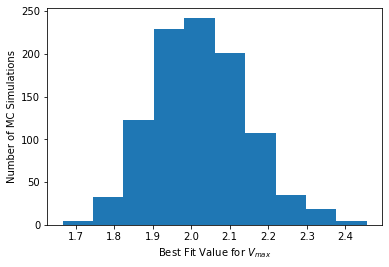

In [21]:
# Histogram for Vmax
plt.hist(theta_mc[:,0])
plt.xlabel("Best Fit Value for $V_{max}$")
plt.ylabel("Number of MC Simulations")
plt.show()

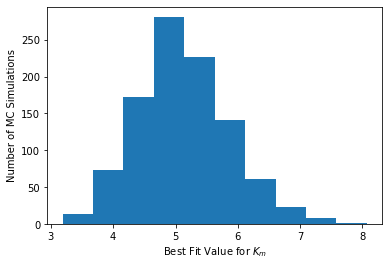

In [22]:
# Histogram for Km
plt.hist(theta_mc[:,1])
plt.xlabel("Best Fit Value for $K_{m}$")
plt.ylabel("Number of MC Simulations")
plt.show()

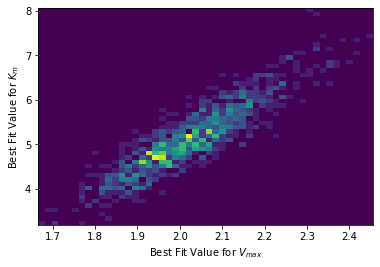

In [23]:
# We can even make a 2D histogram
plt.hist2d(theta_mc[:,0], theta_mc[:,1],bins=50)
plt.xlabel("Best Fit Value for $V_{max}$")
plt.ylabel("Best Fit Value for $K_{m}$")
plt.show()

## Compute Covariance Matrix

In [24]:
## We can calculate covariance in one, carefully constructed line
# For some reason, the NumPy developers choose to assume each ROW is a new variable
# and each COLUMN is a different observation. I would have choose a flipped convention.
# Our 'theta_mc' has each row as a different observation (simulation).
# 'rowvar=False' tells NumPy to flip its convention. This is a great example of
# WHY YOU SHOULD ALWAYS CHECK THE DOCUMENTATION!!!
np.cov(theta_mc,rowvar=False)

array([[0.01497054, 0.08128554],
       [0.08128554, 0.54461604]])